logistic regression

二项式逻辑回归  sigmoid函数

多项式逻辑回归   softmax分类器





In [0]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib

args=Namespace(seed=1234,data_file="titanic.csv",train_size=0.75,test_size=0.25,num_epochs=100)

np.random.seed(args.seed)

url="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/data/titanic.csv"
response=urllib.request.urlopen(url)
html=response.read()
with open(args.data_file,'wb') as f:
    f.write(html)

df=pd.read_csv(args.data_file,header=0)
df.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [0]:
print(df.shape)

(1309, 11)


**1.**

SGDClassifier类  随机梯度下降法
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

**2.**

标准化的预处理相关步骤要在数据集划分之后才进行；无关标准化的预处理，可以在分割数据集之前进行



In [0]:
from sklearn.linear_model import SGDClassifier #1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#数据预处理 2
def preprocess(df):
    #drop the row which contains NAN
    df=df.dropna()
    #delete 基于文本的特征
    features_to_drop=["name","cabin","ticket"]
    df=df.drop(features_to_drop,axis=1)
    #使用one hot code处理类别变量
    categorical_features=["pclass","embarked","sex"]
    df=pd.get_dummies(df,columns=categorical_features)
    return df
 
df=preprocess(df)
df.head()

,age,sibsp,parch,fare,survived,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,29.0000,0,0,211.3375,1,1,0,0,0,0,1,1,0
1,0.9167,1,2,151.5500,1,1,0,0,0,0,1,0,1
2,2.0000,1,2,151.5500,0,1,0,0,0,0,1,1,0
3,30.0000,1,2,151.5500,0,1,0,0,0,0,1,0,1
4,25.0000,1,2,151.5500,0,1,0,0,0,0,1,1,0


In [0]:
print(df.shape)

(270, 13)


**2.**

numpy.random.rand(d0,d1,....)  随机样本位于[0,1)

numpy.random.randn(d0,d1,....)是从标准正态分布中返回一个或多个样本值

np.random.rand(2,4)----generate a 2*4 array



In [0]:
#departinto train_set and test_set
mask=np.random.rand(len(df))<args.train_size
train_df=df[mask]
test_df=df[~mask]
print(len(train_df),len(test_df))

199 71


In [0]:
print(test_df)

In [0]:
#dataframe中的survived属性是分类标签，分离数据和标签
X_train=train_df.drop(["survived"],axis=1)#cannot leave out the attribute of axis
y_train=train_df["survived"]
X_test=test_df.drop(["survived"],axis=1)
y_test=test_df["survived"]


In [0]:
#compute the mean, the var...
X_scaler=StandardScaler().fit(X_train)
#分别对进行标准化，互不干扰

#standardize train_set and test_set by using mean and var of X_train set
std_X_train=X_scaler.transform(X_train)
std_X_test=X_scaler.transform(X_test)

print(std_X_train.shape,std_X_test.shape)


(199, 12) (71, 12)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [0]:
print(np.mean(std_X_train,axis=0),np.std(std_X_train,axis=0))

[-1.78528326e-17  7.14113302e-17 -5.80217058e-17 -5.35584977e-17
  3.57056651e-17 -8.92641628e-17  3.57056651e-17 -3.79372692e-17
  0.00000000e+00  3.79372692e-17  1.04885391e-16 -6.69481221e-17] [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


**3.**

predict_proba---probability estimates

this method is only available for log oss and modified huber loss

predict_log_proba----log of probability estimate



In [0]:
#probability
#2个类别，每个数据属于这两类的概率，所以predtest应该是一个71*2
pred_test=log_reg.predict_proba(std_X_test)
#print(pred_test)
print(pred_test.shape)

(71, 2)


In [0]:
#initial the model--fit--predict
log_reg=SGDClassifier(loss="log",penalty="none",max_iter=args.num_epochs,random_state=args.seed)
log_reg.fit(std_X_train,y=y_train)
pred_train=log_reg.predict(std_X_train)
pred_test=log_reg.predict(std_X_test)
print(type(log_reg))
print(type(pred_train))
print(log_reg.coef_)

<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
<class 'numpy.ndarray'>
[[-0.33403597  0.25164519  0.65176581 -0.57140549 -0.91653946  0.56330941
   0.72877228  0.05418594  0.         -0.05418594  1.47112277 -1.47112277]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


**４．**

sklearn.metrics

accuracy_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


In [0]:
#compute the accuracy
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,pred_train)
test_acc=accuracy_score(y_test,pred_test)
print("train acc:{0:.2f},test acc:{1:.2f}".format(train_acc,test_acc))


train acc:0.77,test acc:0.82


**5.**

混淆矩阵
$\text{confuse_matrix}=
\left[
\begin{array}{c c}
TP & FP\\
FN & TN \\
\end{array}
\right]
$

TP--真阳性记录数 FP--假阳性记录数

FN--假阴性记录数 TN--真阴性记录数





**6.**
classification_report

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

f1-score
support


**7. **

confusion matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix


**8.**

precision_recall_fscore_support

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support




9.
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow

plt.imshow(...)
将图像显示在二维坐标轴上
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow


plt.colorbar()


plt.xticks(...)
plt.text(...)


10.

itertools.product(...)

product(list1, list2) 依次取出list1中的每1个元素，与list2中的每1个元素，组成元组， 
然后，将所有的元组组成一个列表，返回。

In [0]:
#draw confusion matrix
import itertools
from sklearn.metrics import classification_report,confusion_matrix
def plot_confusion_matrix(cm,classes):
    cmap=plt.cm.Greens #改变方格的颜色，Blues,Greens,Reds
    #去掉cmap=cmap 图变得五颜六色
    #interpolation 颜色填充的形式
    #Acceptable values are ‘none’, ‘nearest’, ‘bilinear’, ‘bicubic’, ‘spline16’, ‘spline36’, ‘hanning’, ‘hamming’, ‘hermite’, ‘kaiser’, ‘quadric’, ‘catrom’, ‘gaussian’, ‘bessel’, ‘mitchell’, ‘sinc’, ‘lanczos’
    plt.imshow(cm,interpolation='nearest',cmap=cmap)  
    
    plt.title("Confusion Matrix")
    plt.colorbar()#右边的颜色条
    #plt.xticks  设置x轴坐标的刻度多少，每个刻度的名字
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    plt.grid(False)

    #方格中的数字
    fmt='d'
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.tight_layout()


              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.91      0.74      0.82        39

   micro avg       0.82      0.82      0.82        71
   macro avg       0.82      0.82      0.82        71
weighted avg       0.83      0.82      0.82        71



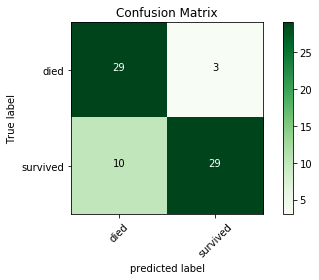

In [0]:
cm=confusion_matrix(y_test,pred_test)
plot_confusion_matrix(cm,classes=["died","survived"])
print(classification_report(y_test,pred_test))

In [0]:
#infer
X_infer=pd.DataFrame([{"name":"Goku Mohandas","cabin":"E","ticket":"E44","pclass":1,"age":24,"sibsp":1,"parch":2,"fare":100,"embarked":"C","sex":"male"}])
X_infer.head()

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,ticket
0,24,E,C,100,Goku Mohandas,2,1,male,1,E44


In [0]:
X_infer=preprocess(X_infer)

missing_features=set(X_test.columns)-set(X_infer.columns)
for feature in missing_features:
    X_infer[feature]=0
X_infer=X_infer[X_train.columns]

In [0]:
X_infer=X_infer[X_train.columns]
X_infer

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,24,1,2,100,0,0,0,0,0,0,0,0


In [0]:
std_X_infer=X_scaler.transform(X_infer)
y_infer=log_reg.predict_proba(std_X_infer)
classses={0:"died",1:"survived"}
_class=np.argmax(y_infer)
print(classses[_class],y_infer[0][_class]*100.0)

survived 57.30223505582339


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [0]:
# 未标准化系数
coef = log_reg.coef_ / X_scaler.scale_
intercept = log_reg.intercept_ - np.sum((coef * X_scaler.mean_))
print (coef)
print (intercept)

[[-0.02155712  0.39758992  0.78341184 -0.0070509  -2.71953415  2.01530102
   3.50708962  0.11008796  0.         -0.11008796  2.94675085 -2.94675085]]
[5.10843738]


In [0]:
indices=np.argsort(coef)
features=list(X_train.columns)
indices

array([[11,  4,  9,  0,  3,  8,  7,  1,  2,  5, 10,  6]])

In [0]:
for i in indices:
  print(coef.ravel()[i])
 

[-2.94675085 -2.71953415 -0.11008796 -0.02155712 -0.0070509   0.
  0.11008796  0.39758992  0.78341184  2.01530102  2.94675085  3.50708962]


K次交叉验证  验证模型的精度

K次循环中是不是都会经历过一次 训练 测试 求精度

log_reg=SGDClassifier(loss="log",penalty="none",max_iter=args.num_epochs,random_state=args.seed)
log_reg.fit(std_X_train,y=y_train)


pred_train=log_reg.predict(std_X_train)

pred_test=log_reg.predict(std_X_test)

print(log_reg.coef_)

用不同的数据集都会产生不停的coef，所以应该选择精度最大的数据集。可是吧，这样子的做法，并不是对同一模型在进行验证呀，而是对这个数据集选择最好的模型而已。这样子确定的模型，他运用的到其他数据集会有效吗？

所以传统的思考是做一个模型，模型不动，让数据来适应他，不适应就换模型；现在是，让模型随着数据集动，也就是说找一个模型来契合这个数据集。所以数据集所包含的种类越多，训练出来的模型就会越适用，越精确。数据集趋向全集，应该会让模型越适用
